# Artificial Intelligence Project Predicting Diabetes with KNN - K Nearest Neighbors Model



In this project, an artificial intelligence model that predicts diabetes was created by looking at real patient data sets through the KNN model with Machine Learning.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Outcome = 1 Diabetic
# Outcome  = 0 Healthy

data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


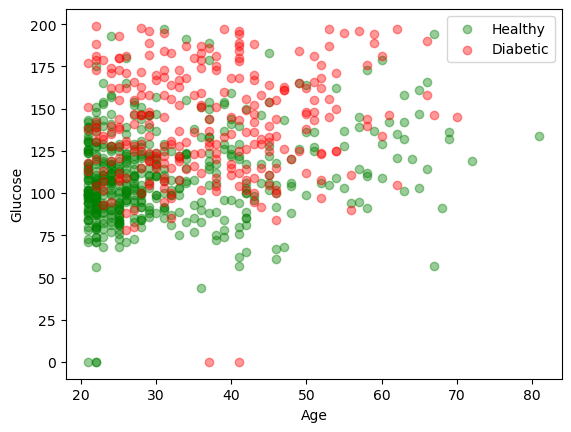

In [5]:
diabetic_patients = data[data.Outcome == 1]
healthy_patients = data[data.Outcome ==  0]

# Let's make a sample drawing just by looking at glucose for now.
# At the end of our program, our machine learning model will make predictions not only based on glucose but also on all other data...

plt.scatter(healthy_patients.Age , healthy_patients.Glucose , color = "green", label = "Healthy" , alpha = 0.4 )
plt.scatter(diabetic_patients.Age , diabetic_patients.Glucose , color = "red", label = "Diabetic" , alpha = 0.4 )
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

In [6]:


# Let's determine the x and y axes.
y = data.Outcome.values
x_raw_data = data.drop(["Outcome"] , axis = 1)
# We are removing the Outcome column (dependent variable) and keeping only the independent variables.
# Because the KNN algorithm will perform clustering within the x values.

# We are performing normalization - updating the values in x_raw_data to be within the range of 0 and 1.
# If we don't normalize this way, high values could overshadow small ones, potentially misleading the KNN algorithm!

x = (x_raw_data - np.min(x_raw_data))/(np.max(x_raw_data)-np.min(x_raw_data))

# First

print("Raw data before normalization:\n")
print(x_raw_data.head())

# Then

print("\n\n\nData we will provide for artificial intelligence training after normalization:\n")
print(x.head())

Raw data before normalization:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  



Data we will provide for artificial intelligence training after normalization:

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.007092  0.174941       0.085106       0.041371  0.000000  0.039716   
1     0.001182  0.100473       0.078014       0.034279  0.000000  0.031442   
2     0.

In [37]:



# We are separating our training data from our test data.
# Our training data will be used for the system to learn how to distinguish between healthy and sick individuals.
# While our test data will be used to evaluate whether our machine learning model can correctly distinguish between healthy and sick individuals.
# ...will be used for testing.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1 ,random_state=1)


# We are creating our KNN model.
knn = KNeighborsClassifier(n_neighbors = 1) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print("The validation test result for K=1 on our test data ", knn.score(x_test, y_test)*100)




The validation test result for K=1 on our test data  79.22077922077922


In [35]:



# What should be the value of k
# Let's determine the optimal value for k.

counter  = 1
for k in range(1,11):
    knn_new = KNeighborsClassifier(n_neighbors = k )
    knn_new.fit(x_train,y_train)
    print(counter, " ", "Accuracy rate: %" , knn_new.score(x_test,y_test)*100)
    counter += 1

1   Accuracy rate: % 79.22077922077922
2   Accuracy rate: % 74.02597402597402
3   Accuracy rate: % 77.92207792207793
4   Accuracy rate: % 74.02597402597402
5   Accuracy rate: % 72.72727272727273
6   Accuracy rate: % 75.32467532467533
7   Accuracy rate: % 74.02597402597402
8   Accuracy rate: % 76.62337662337663
9   Accuracy rate: % 76.62337662337663
10   Accuracy rate: % 76.62337662337663


In [43]:



#For a new patient prediction
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


scaler = MinMaxScaler()


x_normalized = scaler.fit_transform(x_raw_data)


x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.2, random_state=42)


knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x_train, y_train)


y_pred = knn_classifier.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Rate:", accuracy)


Doğruluk Oranı: 0.6948051948051948
